In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import pathlib

In [2]:
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\train",
  validation_split=0.8,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1443 files belonging to 4 classes.
Using 289 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 343 files belonging to 4 classes.
Using 68 files for validation.


In [5]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 255.0


In [6]:
class_names = train_ds.class_names
print(class_names)

['bacterial_blight', 'curl_virus', 'fussarium_wilt', 'healthy']


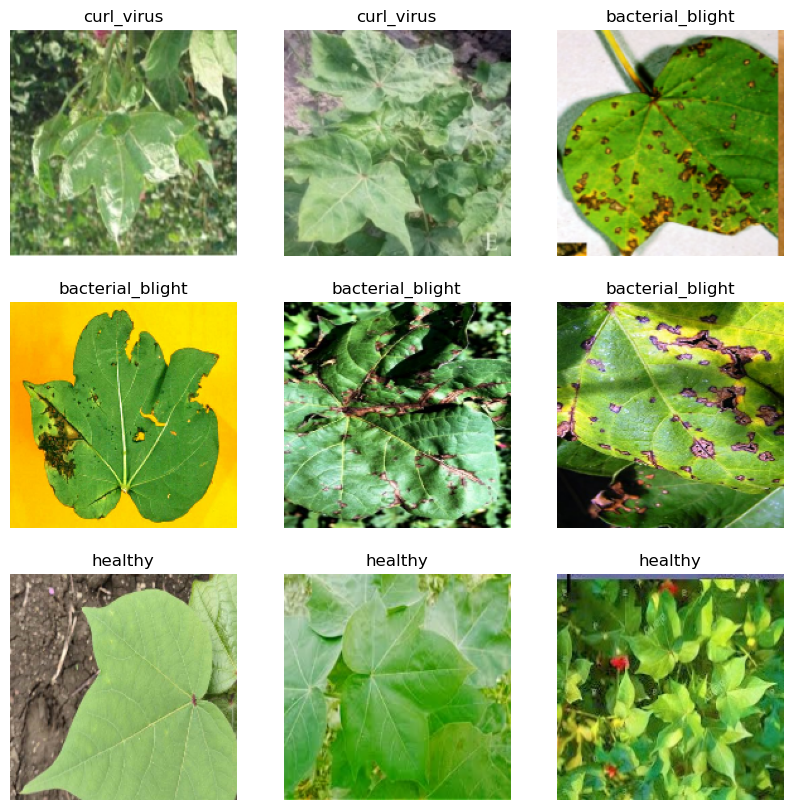

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = len(class_names)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
epochs=80
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/80
10/10 [==============================] - 11s 718ms/step - loss: 1.8783 - accuracy: 0.2561 - val_loss: 1.3287 - val_accuracy: 0.4265
Epoch 2/80
10/10 [==============================] - 6s 619ms/step - loss: 1.2560 - accuracy: 0.4671 - val_loss: 1.2047 - val_accuracy: 0.3971
Epoch 3/80
10/10 [==============================] - 6s 617ms/step - loss: 1.0756 - accuracy: 0.5087 - val_loss: 0.9894 - val_accuracy: 0.6176
Epoch 4/80
10/10 [==============================] - 6s 625ms/step - loss: 0.8316 - accuracy: 0.6817 - val_loss: 0.9161 - val_accuracy: 0.6029
Epoch 5/80
10/10 [==============================] - 6s 616ms/step - loss: 0.6438 - accuracy: 0.7163 - val_loss: 0.7586 - val_accuracy: 0.6618
Epoch 6/80
10/10 [==============================] - 6s 622ms/step - loss: 0.5001 - accuracy: 0.7993 - val_loss: 0.7856 - val_accuracy: 0.6912
Epoch 7/80
10/10 [==============================] - 6s 624ms/step - loss: 0.3988 - accuracy: 0.8616 - val_loss: 0.6268 - val_accuracy: 0.7353
Epoch

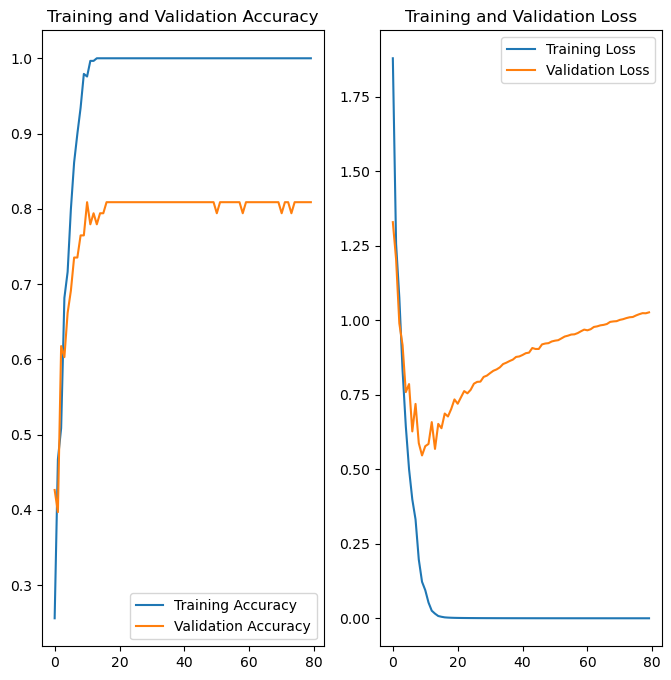

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [17]:
true_labels = []
predicted_labels = []

In [18]:
test_ds = tf.keras.utils.image_dataset_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 343 files belonging to 4 classes.
Using 68 files for validation.


In [19]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 227ms/step


In [20]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8088235294117647


In [21]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
                   precision    recall  f1-score   support

bacterial_blight       0.82      0.86      0.84        21
      curl_virus       0.79      0.61      0.69        18
  fussarium_wilt       0.94      1.00      0.97        15
         healthy       0.69      0.79      0.73        14

        accuracy                           0.81        68
       macro avg       0.81      0.81      0.81        68
    weighted avg       0.81      0.81      0.80        68



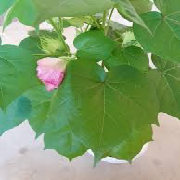

In [22]:

from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test\healthy\h59.jpg",target_size=(img_height,img_width))
img

In [23]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 84ms/step


array([3], dtype=int64)

In [24]:
prediction = class_names[result[0]]
prediction

'healthy'

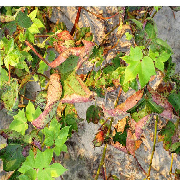

In [25]:

from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test\fussarium_wilt\fus78.jpg",target_size=(img_height,img_width))
img

In [26]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 63ms/step


array([2], dtype=int64)

In [27]:
prediction = class_names[result[0]]
prediction

'fussarium_wilt'

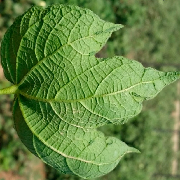

In [28]:

from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test\curl_virus\curl91.jpg",target_size=(img_height,img_width))
img

In [29]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 60ms/step


array([1], dtype=int64)

In [30]:
prediction = class_names[result[0]]
prediction

'curl_virus'

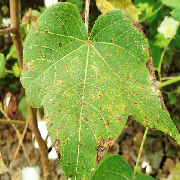

In [31]:

from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test\bacterial_blight\bact77.jpg",target_size=(img_height,img_width))
img

In [32]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(model.predict(test_image), axis=1)
result

1/1 [==============================] - 0s 47ms/step


array([0], dtype=int64)

In [33]:
prediction = class_names[result[0]]
prediction

'bacterial_blight'

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [35]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=9,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(num_classes))

In [36]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 128)               262272    
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 4)                 516       
 apper)                                                          
                                                                 
Total params: 23850500 (90.98 MB)
Trainable params: 262788 (1.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________

In [37]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [38]:
epochs=20
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
10/10 [==============================] - 35s 3s/step - loss: 1.2673 - accuracy: 0.5744 - val_loss: 0.6469 - val_accuracy: 0.7206
Epoch 2/20
10/10 [==============================] - 24s 2s/step - loss: 0.3437 - accuracy: 0.8893 - val_loss: 0.3029 - val_accuracy: 0.9118
Epoch 3/20
10/10 [==============================] - 24s 2s/step - loss: 0.1604 - accuracy: 0.9550 - val_loss: 0.1644 - val_accuracy: 0.9706
Epoch 4/20
10/10 [==============================] - 24s 3s/step - loss: 0.0785 - accuracy: 0.9862 - val_loss: 0.1280 - val_accuracy: 0.9559
Epoch 5/20
10/10 [==============================] - 24s 2s/step - loss: 0.0478 - accuracy: 0.9931 - val_loss: 0.1233 - val_accuracy: 0.9853
Epoch 6/20
10/10 [==============================] - 24s 2s/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.1090 - val_accuracy: 0.9559
Epoch 7/20
10/10 [==============================] - 26s 3s/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.1037 - val_accuracy: 0.9706
Epoch 8/20
10/10 [==

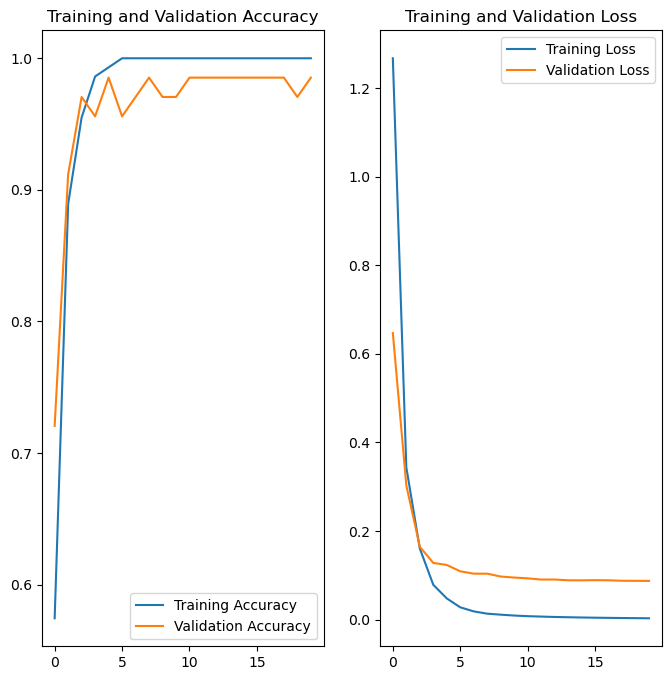

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

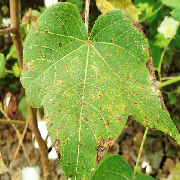

In [40]:

from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test\bacterial_blight\bact77.jpg",target_size=(img_height,img_width))
img

In [41]:
test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result =np.argmax(resnet_model.predict(test_image), axis=1)
result

1/1 [==============================] - 2s 2s/step


array([0], dtype=int64)

In [42]:
prediction = class_names[result[0]]
prediction

'bacterial_blight'

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [44]:
test_ds = tf.keras.utils.image_dataset_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 343 files belonging to 4 classes.
Using 68 files for validation.


In [45]:
true_labels = []
predicted_labels = []

In [46]:
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = resnet_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 0s 367ms/step


In [47]:
# Calculate accuracy
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.9852941176470589


In [48]:
# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
                   precision    recall  f1-score   support

bacterial_blight       1.00      1.00      1.00        21
      curl_virus       1.00      1.00      1.00        18
  fussarium_wilt       1.00      0.93      0.97        15
         healthy       0.93      1.00      0.97        14

        accuracy                           0.99        68
       macro avg       0.98      0.98      0.98        68
    weighted avg       0.99      0.99      0.99        68



In [49]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob

# Define IMAGE_SIZE and other parameters
IMAGE_SIZE = [180, 180]
BATCH_SIZE = 32


# Load the pre-trained VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the layers of the pre-trained model
for layer in vgg.layers:
    layer.trainable = False

num_classes = len(class_names)

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Scale pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define the custom top layers
x = Flatten()(vgg.output)
prediction = Dense(num_classes, activation='softmax')(x)

# Create the custom model
vgg_model = Model(inputs=vgg.input, outputs=prediction)

# Compile the model
vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # You can adjust the learning rate as needed
    metrics=['accuracy']
)
train_ds = datagen.flow_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\train",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_ds = datagen.flow_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test",
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1442 images belonging to 4 classes.
Found 343 images belonging to 4 classes.


In [50]:
epochs=7
history = vgg_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/7
46/46 [==============================] - 273s 6s/step - loss: 1.1833 - accuracy: 0.5090 - val_loss: 0.9729 - val_accuracy: 0.6793
Epoch 2/7
46/46 [==============================] - 273s 6s/step - loss: 0.8928 - accuracy: 0.7108 - val_loss: 0.8226 - val_accuracy: 0.7376
Epoch 3/7
46/46 [==============================] - 286s 6s/step - loss: 0.7668 - accuracy: 0.7559 - val_loss: 0.7181 - val_accuracy: 0.7872
Epoch 4/7
46/46 [==============================] - 314s 7s/step - loss: 0.6904 - accuracy: 0.7906 - val_loss: 0.6873 - val_accuracy: 0.7813
Epoch 5/7
46/46 [==============================] - 315s 7s/step - loss: 0.6444 - accuracy: 0.8003 - val_loss: 0.6364 - val_accuracy: 0.7872
Epoch 6/7
46/46 [==============================] - 273s 6s/step - loss: 0.5805 - accuracy: 0.8252 - val_loss: 0.6152 - val_accuracy: 0.7901
Epoch 7/7
46/46 [==============================] - 269s 6s/step - loss: 0.5469 - accuracy: 0.8315 - val_loss: 0.5725 - val_accuracy: 0.8076


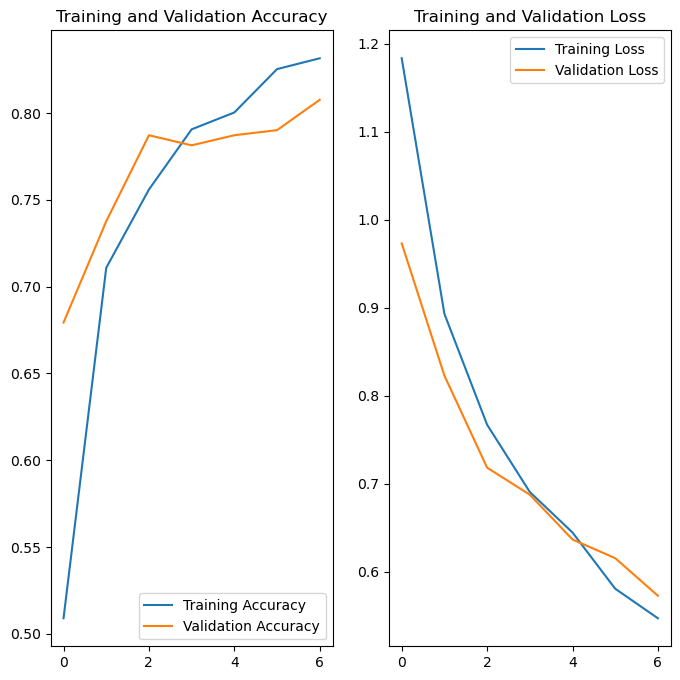

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
test_ds = tf.keras.utils.image_dataset_from_directory(r"C:\Users\ADMIN\Downloads\crop leaf disease ml\cotton_infection_dir_ready\test",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 343 files belonging to 4 classes.
Using 68 files for validation.


In [53]:
true_labels = []
predicted_labels = []
# Iterate through the test dataset to make predictions
for images, labels in test_ds:
    predicted_batch = vgg_model.predict(images)
    predicted_labels.extend(np.argmax(predicted_batch, axis=1))
    true_labels.extend(labels.numpy())

1/1 [==============================] - 1s 920ms/step


In [54]:
accuracy = metrics.accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.7058823529411765


In [55]:
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:\n", class_report)

Classification Report:
                   precision    recall  f1-score   support

bacterial_blight       0.65      0.95      0.77        21
      curl_virus       0.69      0.61      0.65        18
  fussarium_wilt       0.79      0.73      0.76        15
         healthy       0.86      0.43      0.57        14

        accuracy                           0.71        68
       macro avg       0.74      0.68      0.69        68
    weighted avg       0.73      0.71      0.69        68

